# CMPS 290C: Dimensionality Reduction Miniproject

Keller Jordan, Sanjay Krishna Gouda, Brett Gohre, Numra Bathool

We apply t-SNE, LargeVis, and TriMap to the [ISOLET dataset](https://archive.ics.uci.edu/ml/datasets/ISOLET) of spoken letters, and report various metrics of visualization goodness. We also demonstrate an alternative invariance that is surprisingly satisfied by all three (?) methods. Lastly, we present animations of TriMap trained using different optimizers.

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD

# load ISOLET dataset
df1 = pd.read_csv('isolet1+2+3+4.data', header=None)
df2 = pd.read_csv('isolet5.data', header=None)
df = pd.concat([df1, df2], axis=0)
X = np.array(df.iloc[:, :-1])
labels = np.array(df.iloc[:, -1])

# min-max scale, zero-center, and reduce dataset to top 50 SVD components
X -= np.min(X)
X /= np.max(X)
X -= np.mean(X, axis=0)
X = TruncatedSVD(n_components=50, random_state=0).fit_transform(X)

In [ ]:
from sklearn.manifold import TSNE
import trimap # PyTorch implementation of TriMap for fast GPU embedding

# embed into 2D space using t-SNE, LargeVis, and TriMap
Y_tsne = TSNE(n_components=2, perplexity=30.0, n_iter=2000, verbose=False).fit_transform(X)
Y_largevis = None
Y_trimap = trimap.embed(X, verbose=False)

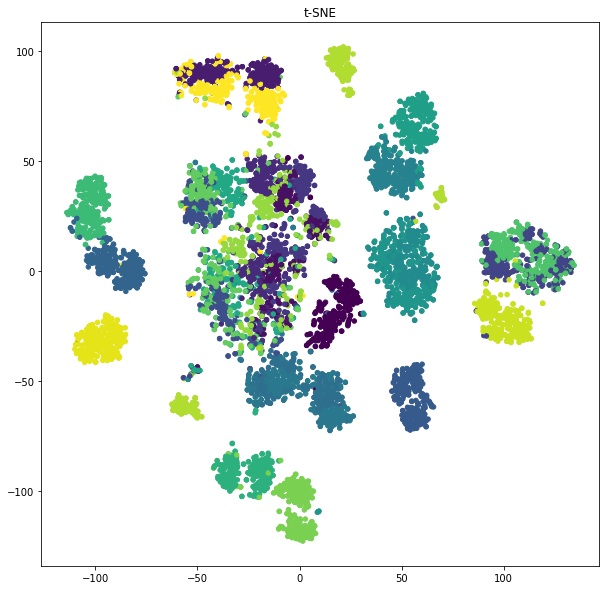

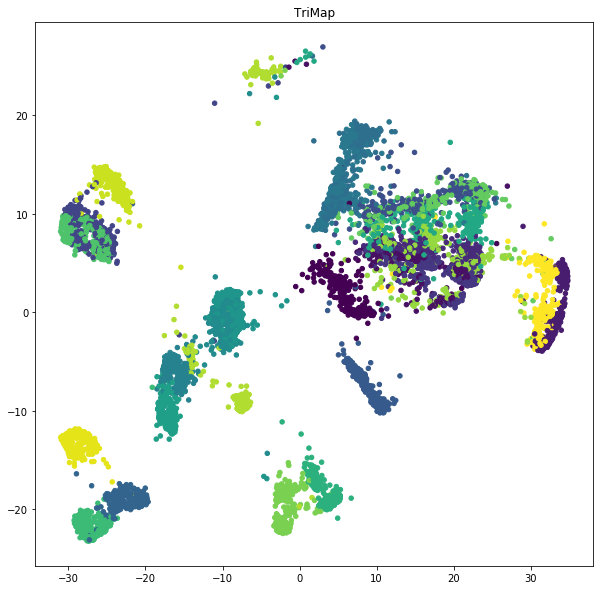

In [17]:
import matplotlib.pyplot as plt

def plot_embedding(Y, labels, title):
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(Y[:, 0], Y[:, 1], 20, labels)
    plt.title(title)

plot_embedding(Y_tsne, labels, title='t-SNE')
# plot_embedding(Y_largevis, labels)
plot_embedding(Y_trimap, labels, title='TriMap')
plt.show()

In [31]:
from sklearn.neighbors import NearestNeighbors as knn

# compute nearest-neighbor indices for input space and each embedding
_, nbrs_input = knn(n_neighbors=50).fit(X).kneighbors(X)
_, nbrs_tsne = knn(n_neighbors=400).fit(Y_tsne).kneighbors(Y_tsne)
# _, nbrs_largevis = knn(n_neighbors=100).fit(Y_largevis).kneighbors(Y_largevis)
_, nbrs_trimap = knn(n_neighbors=400).fit(Y_trimap).kneighbors(Y_trimap)

In [33]:
from metrics import roc_metrics
from metrics import mean_precision_recall
# from metrics import trustworthiness_continuity

tp_tsne, fp_tsne = roc_metrics(nbrs_input, nbrs_tsne)
# tp_largevis, fp_largevis = roc_metrics(nbrs_input, nbrs_largevis)
tp_trimap, fp_trimap = roc_metrics(nbrs_input, nbrs_trimap)
recall_tsne, precision_tsne = mean_precision_recall(nbrs_input, nbrs_tsne)
# recall_largevis, precision_largevis = mean_precision_recall(nbrs_input, nbrs_largevis)
recall_trimap, precision_trimap = mean_precision_recall(nbrs_input, nbrs_trimap)
# recall_tsne, precision_tsne = mean_precision_recall(nbrs_input, nbrs_tsne)
# # recall_largevis, precision_largevis = mean_precision_recall(nbrs_input, nbrs_largevis)
# recall_trimap, precision_trimap = mean_precision_recall(nbrs_input, nbrs_trimap)

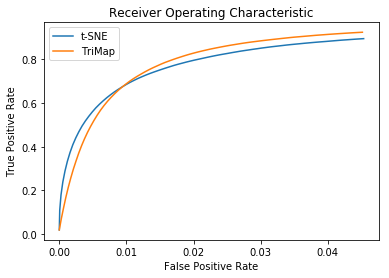

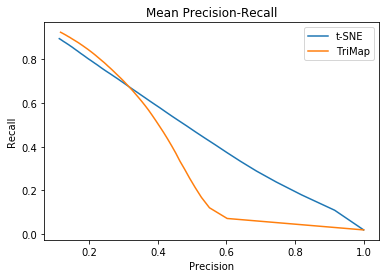

In [34]:
plt.figure()
plt.plot(fp_tsne, tp_tsne, label='t-SNE')
# plt.plot(fp_largevis, tp_largevis, label='LargeVis')
plt.plot(fp_trimap, tp_trimap, label='TriMap')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()

plt.figure()
plt.plot(precision_tsne, recall_tsne, label='t-SNE')
# plt.plot(precision_largevis, recall_largevis, label='LargeVis')
plt.plot(precision_trimap, recall_trimap, label='TriMap')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Mean Precision-Recall')
plt.legend()

plt.figure()
plt.plot(precision_tsne, recall_tsne, label='t-SNE')
# plt.plot(precision_largevis, recall_largevis, label='LargeVis')
plt.plot(precision_trimap, recall_trimap, label='TriMap')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Trustworthiness-Continuity')
plt.legend()

plt.show()